# Importing Libraries

In [ ]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [ ]:
df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")
df.sample(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
9675,OD9676,Mathew,Beverages,Soft Drinks,Ramanadhapuram,12-06-2017,West,962,0.23,317.46,Tamil Nadu
2501,OD2502,Willams,Food Grains,Organic Staples,Pudukottai,9/25/2016,East,2174,0.25,782.64,Tamil Nadu
9401,OD9402,Vince,"Eggs, Meat & Fish",Mutton,Theni,5/25/2017,South,1358,0.18,393.82,Tamil Nadu
6590,OD6591,Sundar,Snacks,Noodles,Dharmapuri,5/20/2015,Central,656,0.33,255.84,Tamil Nadu
7394,OD7395,Vidya,Fruits & Veggies,Organic Vegetables,Viluppuram,8/16/2016,East,2347,0.19,422.46,Tamil Nadu


In [ ]:
df.drop(["Order ID"], axis=1, inplace=True)

In [ ]:
df.shape

(9994, 10)

In [ ]:
df.size

99940

In [ ]:
df.index

RangeIndex(start=0, stop=9994, step=1)

In [ ]:
df.columns


Index(['Customer Name', 'Category', 'Sub Category', 'City', 'Order Date',
       'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer Name  9994 non-null   object 
 1   Category       9994 non-null   object 
 2   Sub Category   9994 non-null   object 
 3   City           9994 non-null   object 
 4   Order Date     9994 non-null   object 
 5   Region         9994 non-null   object 
 6   Sales          9994 non-null   int64  
 7   Discount       9994 non-null   float64
 8   Profit         9994 non-null   float64
 9   State          9994 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 780.9+ KB


In [ ]:
df.isna().sum()

,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0
State,0


In [ ]:
df["Customer Name"].unique()


array(['Harish', 'Sudha', 'Hussain', 'Jackson', 'Ridhesh', 'Adavan',
       'Jonas', 'Hafiz', 'Krithika', 'Ganesh', 'Yadav', 'Sharon', 'Peer',
       'Sundar', 'Ramesh', 'Alan', 'Arutra', 'Haseena', 'Verma', 'Muneer',
       'Veronica', 'Shah', 'Mathew', 'Akash', 'Anu', 'Sabeela', 'James',
       'Willams', 'Malik', 'Amrish', 'Vince', 'Suresh', 'Esther', 'Yusuf',
       'Komal', 'Veena', 'Shree', 'Roshan', 'Sudeep', 'Vinne', 'Vidya',
       'Arvind', 'Kumar', 'Amy', 'Ravi', 'Sheeba', 'Ram', 'Rumaiza',
       'Aditi', 'Surya'], dtype=object)

In [ ]:
df["Category"].unique()

array(['Oil & Masala', 'Beverages', 'Food Grains', 'Fruits & Veggies',
       'Bakery', 'Snacks', 'Eggs, Meat & Fish'], dtype=object)

In [ ]:
df["Sub Category"].unique()

array(['Masalas', 'Health Drinks', 'Atta & Flour', 'Fresh Vegetables',
       'Organic Staples', 'Fresh Fruits', 'Biscuits', 'Cakes',
       'Chocolates', 'Eggs', 'Cookies', 'Chicken', 'Edible Oil & Ghee',
       'Mutton', 'Soft Drinks', 'Dals & Pulses', 'Organic Vegetables',
       'Noodles', 'Organic Fruits', 'Fish', 'Spices', 'Rice',
       'Breads & Buns'], dtype=object)

In [ ]:
df["City"].unique()

array(['Vellore', 'Krishnagiri', 'Perambalur', 'Dharmapuri', 'Ooty',
       'Trichy', 'Ramanadhapuram', 'Tirunelveli', 'Chennai', 'Karur',
       'Namakkal', 'Dindigul', 'Kanyakumari', 'Bodi', 'Tenkasi',
       'Viluppuram', 'Madurai', 'Salem', 'Cumbum', 'Nagercoil',
       'Pudukottai', 'Theni', 'Coimbatore', 'Virudhunagar'], dtype=object)

In [ ]:
df["Region"].unique()

array(['North', 'South', 'West', 'Central', 'East'], dtype=object)

In [ ]:
df["Order Date"].sample(5)

,Order Date
1993,7/18/2018
2751,10-02-2016
3891,05-03-2015
9689,09-07-2015
501,5/30/2017


In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="mixed")

In [ ]:
df["Order Date"].sample(5)

,Order Date
297,2015-12-26
8649,2017-11-13
6958,2018-07-20
7730,2015-10-31
2004,2016-12-11


In [ ]:

# Extracting Year from Order Date Column
df["Year"] = df["Order Date"].dt.year

# Extracting Month Names from Order Date Column
df["Month"] = df["Order Date"].dt.month_name()

# Extracting Date from Order Date Column
df["Date"] = df["Order Date"].dt.day

In [ ]:
# We are extracting Discount Amount from Discount Percentage
# By using formula : CP = (SP*100/100-Discount%)
# And then we are subtracting CP from SP to get Discount Amount
df["Discount_Amt"] = round((df["Sales"]*100)/(100-(df["Discount"]*100))).astype(int) - df["Sales"]

In [ ]:
# Dropping Order Date Column
df.drop(["Order Date","Discount"], axis=1, inplace=True)

In [ ]:
df.head(5)

,Customer Name,Category,Sub Category,City,Region,Sales,Profit,State,Year,Month,Date,Discount_Amt
0,Harish,Oil & Masala,Masalas,Vellore,North,1254,401.28,Tamil Nadu,2017,November,8,171
1,Sudha,Beverages,Health Drinks,Krishnagiri,South,749,149.80,Tamil Nadu,2017,November,8,164
2,Hussain,Food Grains,Atta & Flour,Perambalur,West,2360,165.20,Tamil Nadu,2017,June,12,627
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,South,896,89.60,Tamil Nadu,2016,October,11,299
4,Ridhesh,Food Grains,Organic Staples,Ooty,South,2355,918.45,Tamil Nadu,2016,October,11,827


In [ ]:
# Count of products sold in each Category
df["Category"].value_counts()

,count
Category,
Snacks,1514
"Eggs, Meat & Fish",1490
Fruits & Veggies,1418
Bakery,1413
Beverages,1400
Food Grains,1398
Oil & Masala,1361


In [ ]:
# Count of products sold in each Sub Category
df["Sub Category"].value_counts()

,count
Sub Category,
Health Drinks,719
Soft Drinks,681
Cookies,520
Breads & Buns,502
Chocolates,499
Noodles,495
Masalas,463
Biscuits,459
Cakes,452


In [ ]:
# Count of products sold in each City
df["City"].value_counts()

,count
City,
Kanyakumari,459
Tirunelveli,446
Bodi,442
Krishnagiri,440
Vellore,435
Perambalur,434
Tenkasi,432
Chennai,432
Salem,431


In [ ]:
# Count of products sold in each Region
df["Region"].value_counts()

,count
Region,
West,3203
East,2848
Central,2323
South,1619
North,1


In [ ]:
# As we have only 1 sales data for North region
# We can remove it for a balance data overall
df = df[df["Region"] != "North"]

In [ ]:
# Count of products sold in each Region after transformation
df["Region"].value_counts()

,count
Region,
West,3203
East,2848
Central,2323
South,1619


In [ ]:
# Count of products sold each Year
df["Year"].value_counts()

,count
Year,
2018,3312
2017,2586
2016,2102
2015,1993


In [ ]:
# Count of products sold each Month
df["Month"].value_counts()

,count
Month,
November,1470
December,1408
September,1383
October,819
May,735
June,717
July,710
August,706
March,696


In [ ]:
# Count of products sold each Date
df["Date"].value_counts()

,count
Date,
20,398
21,396
2,379
5,366
3,365
26,365
11,359
23,358
8,355


In [ ]:
# Total sale in each Category
df.groupby(["Category"])["Sales"].sum().sort_values(ascending=False)

,Sales
Category,
"Eggs, Meat & Fish",2267401
Snacks,2237546
Food Grains,2115272
Bakery,2112281
Fruits & Veggies,2100727
Beverages,2085313
Oil & Masala,2037188


In [ ]:
# Total sale in each Sub Category
df.groupby(["Sub Category"])["Sales"].sum().sort_values(ascending=False)

,Sales
Sub Category,
Health Drinks,1051439
Soft Drinks,1033874
Cookies,768213
Breads & Buns,742586
Noodles,735435
Chocolates,733898
Masalas,696226
Cakes,685612
Biscuits,684083


In [ ]:
# Total sale in each Region
df.groupby(["Region"])["Sales"].sum().sort_values(ascending=False)

,Sales
Region,
West,4798743
East,4248368
Central,3468156
South,2440461


In [ ]:
# Total sale in each City
df.groupby(["City"])["Sales"].sum().sort_values(ascending=False)

,Sales
City,
Kanyakumari,706764
Vellore,675296
Bodi,667177
Tirunelveli,659812
Perambalur,659738
Salem,657093
Pudukottai,653179
Tenkasi,643652
Karur,642273


In [ ]:
# Total sale in each Month
df.groupby(["Month"])["Sales"].sum().sort_values(ascending=False)

,Sales
Month,
November,2192670
December,2088076
September,2064266
October,1243289
July,1089385
May,1086920
June,1057808
March,1053980
August,1046807


In [ ]:
# Total sale in each Year
df.groupby(["Year"])["Sales"].sum().sort_values(ascending=False)

,Sales
Year,
2018,4977512
2017,3870658
2016,3131959
2015,2975599


In [ ]:
# Total profit in each Category
df.groupby(["Category"])["Profit"].sum().sort_values(ascending=False)

,Profit
Category,
Snacks,568178.85
"Eggs, Meat & Fish",567357.22
Fruits & Veggies,530400.38
Food Grains,529162.64
Bakery,528521.06
Beverages,525605.76
Oil & Masala,497494.01


In [ ]:
# Total profit in each Sub Category
df.groupby(["Sub Category"])["Profit"].sum().sort_values(ascending=False)

,Profit
Sub Category,
Health Drinks,267469.79
Soft Drinks,258135.97
Noodles,193685.81
Breads & Buns,190764.98
Cookies,190643.70
Chocolates,183849.34
Biscuits,169357.62
Masalas,168597.83
Edible Oil & Ghee,168593.58


In [ ]:
# Total profit in each Region
df.groupby(["Region"])["Profit"].sum().sort_values(ascending=False)

,Profit
Region,
West,1192004.61
East,1074345.58
Central,856806.84
South,623562.89


In [ ]:
# Total profit in each City
df.groupby(["City"])["Profit"].sum().sort_values(ascending=False)

,Profit
City,
Vellore,173671.73
Bodi,173655.13
Kanyakumari,172217.74
Perambalur,171132.19
Karur,169305.94
Tirunelveli,165169.01
Pudukottai,164072.63
Chennai,160921.33
Salem,160899.30


In [ ]:
# Total profit in each Month
df.groupby(["Month"])["Profit"].sum().sort_values(ascending=False)

,Profit
Month,
November,555646.77
December,530036.44
September,517788.56
October,309376.90
July,274594.57
March,267347.33
May,263643.40
June,263296.16
August,258912.09


In [ ]:
# Total profit in each Year
df.groupby(["Year"])["Profit"].sum().sort_values(ascending=False)

,Profit
Year,
2018,1244182.88
2017,952814.94
2016,797192.99
2015,752529.11


In [ ]:
# Customer's with highest total orders
df.groupby(["Customer Name"])["Sales"].sum().sort_values(ascending=False).head(10)

,Sales
Customer Name,
Krithika,334361
Amrish,333351
Verma,331665
Arutra,325720
Vidya,321798
Vinne,319565
Shah,318588
Suresh,315973
Adavan,315341


In [ ]:
# Most purchased product from each category by Customer's
df.groupby(["Customer Name","Category"])["Category"].count().sort_values(ascending=False).head(10)

,,Category
Customer Name,Category,
Veronica,Fruits & Veggies,43
Amrish,Bakery,42
Yusuf,Oil & Masala,42
Ganesh,Snacks,42
Vidya,"Eggs, Meat & Fish",41
Verma,"Eggs, Meat & Fish",41
Amrish,Food Grains,40
Shah,Bakery,40
Ram,Beverages,40


In [ ]:
# Most purchased product from each sub category by Customer's
df.groupby(["Customer Name","Sub Category"])["Sub Category"].count().sort_values(ascending=False).head(10)

,,Sub Category
Customer Name,Sub Category,
Yadav,Soft Drinks,23
Amy,Health Drinks,22
Ram,Health Drinks,22
Veena,Soft Drinks,21
Ridhesh,Soft Drinks,20
James,Health Drinks,20
Krithika,Cakes,20
Rumaiza,Soft Drinks,20
Amrish,Health Drinks,19


In [ ]:
# Most order placed from different cities by Customer's
df.groupby(["Customer Name","City"])["City"].count().sort_values(ascending=False).head(10)

,,City
Customer Name,City,
Sharon,Ooty,20
Amrish,Viluppuram,18
Sudeep,Madurai,18
James,Ramanadhapuram,18
Esther,Virudhunagar,17
Veronica,Tenkasi,16
Yadav,Perambalur,16
Jonas,Cumbum,16
Ravi,Ramanadhapuram,16


In [ ]:
# Most order placed from different regions by Customer's
df.groupby(["Customer Name","Region"])["Region"].count().sort_values(ascending=False).head(10)

,,Region
Customer Name,Region,
Krithika,West,90
Malik,West,77
Veena,West,76
Mathew,West,75
Veronica,West,75
Arutra,West,74
Peer,West,73
Amrish,West,73
Krithika,East,73


In [ ]:
# Most order placed in different months by Customer's
df.groupby(["Customer Name","Month"])["Month"].count().sort_values(ascending=False).head(10)

,,Month
Customer Name,Month,
Krithika,December,42
Veronica,September,41
Yusuf,November,41
Hussain,November,40
Vinne,December,39
Arutra,December,39
Akash,September,37
Komal,September,37
Hussain,December,37


In [ ]:
# Most order placed in different years by Customer's
df.groupby(["Customer Name","Year"])["Year"].count().sort_values(ascending=False).head(10)

,,Year
Customer Name,Year,
Suresh,2018,80
Adavan,2018,79
Surya,2018,77
Verma,2018,76
Ram,2018,74
Veronica,2018,73
Krithika,2018,72
Akash,2018,72
Vidya,2018,72


In [ ]:
# Total Discount on each Product Category
df.groupby(["Category"])["Discount_Amt"].sum().sort_values(ascending=False)

,Discount_Amt
Category,
"Eggs, Meat & Fish",694041
Snacks,663963
Food Grains,652872
Fruits & Veggies,650275
Beverages,648970
Bakery,638128
Oil & Masala,617326


In [ ]:
# Total Discount on each Sub Product Category
df.groupby(["Sub Category"])["Discount_Amt"].sum().sort_values(ascending=False)

,Discount_Amt
Sub Category,
Health Drinks,328816
Soft Drinks,320154
Breads & Buns,226696
Cookies,224374
Chocolates,221921
Noodles,217668
Edible Oil & Ghee,209592
Masalas,207747
Cakes,206505


In [ ]:
# Total Discount in each Region
df.groupby(["Region"])["Discount_Amt"].sum().sort_values(ascending=False)

,Discount_Amt
Region,
West,1450419
East,1300786
Central,1068850
South,745520


In [ ]:
# Total Discount in each City
df.groupby(["City"])["Discount_Amt"].sum().sort_values(ascending=False)

,Discount_Amt
City,
Vellore,212268
Kanyakumari,211570
Perambalur,207825
Tirunelveli,200610
Tenkasi,199804
Salem,197370
Karur,195645
Pudukottai,195166
Ramanadhapuram,194399


In [ ]:
# Total Discount in each Month
df.groupby(["Month"])["Discount_Amt"].sum().sort_values(ascending=False)

,Discount_Amt
Month,
November,674780
December,630591
September,629729
October,382904
July,339438
May,327797
June,326871
March,324026
August,318511


In [ ]:
# Total Discount in each Year
df.groupby(["Year"])["Discount_Amt"].sum().sort_values(ascending=False)

,Discount_Amt
Year,
2018,1509381
2017,1181457
2016,961588
2015,913149


In [ ]:
# Customer's with most Discount
df.groupby(["Customer Name"])["Discount_Amt"].sum().sort_values(ascending=False).head(10)

,Discount_Amt
Customer Name,
Verma,108213
Amrish,103100
Muneer,99528
Vinne,99354
Shah,99249
Krithika,97860
Sheeba,97108
Hussain,96853
Arutra,96494


In [ ]:
# Sale of Different Category Products Year Wise
df.pivot_table(index="Year", columns="Category", values="Sales", aggfunc="sum")

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
Year,,,,,,,
2015,433979,409091,482982,356704,409212,423918,459713
2016,487965,425719,462055,438736,468441,412725,436318
2017,504263,543575,565101,609338,516400,562942,569039
2018,686074,706928,757263,710494,706674,637603,772476


In [ ]:
# Sale of Different Category Products Month Wise
df.pivot_table(index="Month", columns="Category", values="Sales", aggfunc="sum")

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
Month,,,,,,,
April,123181,151748,143530,128790,138084,157369,155751
August,162277,152976,149694,182850,140885,124935,133190
December,298939,265806,344238,291656,311754,270309,305374
February,54701,60188,58331,62983,74313,62044,83542
January,69139,91775,74158,79531,80753,95324,87292
July,168795,137856,151179,166926,162689,149179,152761
June,154397,140633,181754,128165,153431,129080,170348
March,154253,143575,165977,140169,126704,142637,180665
May,135113,163490,173024,143356,152491,182725,136721


In [ ]:
# Sale of Different Category Products Region Wise
df.pivot_table(index="Region", columns="Category", values="Sales", aggfunc="sum")

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
Region,,,,,,,
Central,448343,501194,516642,463683,526507,453293,558494
East,588241,577206,677830,598868,564237,622071,619915
South,361385,344666,360963,353069,352162,298859,369357
West,714312,662247,711966,699652,657821,662965,689780


In [ ]:
# Profit from Different Category Products Year Wise
df.pivot_table(index="Year", columns="Category", values="Profit", aggfunc="sum")

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
Year,,,,,,,
2015,107567.44,104834.61,126057.88,90837.84,100586.06,105637.64,117007.64
2016,124536.04,110201.14,114208.28,113643.27,118900.21,102656.22,113047.83
2017,122078.77,135179.89,135896.22,149775.58,130630.77,137156.83,142096.88
2018,174338.81,175390.12,191194.84,174905.95,180283.34,152043.32,196026.50


In [ ]:
# Profit from Different Category Products Month Wise
df.pivot_table(index="Month", columns="Category", values="Profit", aggfunc="sum")

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
Month,,,,,,,
April,28491.68,38426.16,37453.93,31279.89,37907.45,36273.10,37644.76
August,40395.81,40139.14,38057.70,42734.55,34780.18,30230.38,32574.33
December,74036.37,67086.34,86623.79,75671.33,76006.63,71378.32,79233.66
February,12636.04,15080.17,15089.23,14680.57,19410.95,17374.45,21810.80
January,18555.36,23958.38,17714.58,18795.67,21362.53,22117.10,20014.90
July,39733.87,35285.65,40908.34,42397.92,40517.79,37037.06,38713.94
June,38539.89,36220.45,44216.92,31192.94,39272.91,31764.42,42088.63
March,42785.93,38049.03,43155.74,32659.45,30729.94,36544.52,43422.72
May,31426.63,38256.46,44998.40,35674.88,38603.40,41634.13,33049.50


In [ ]:
# Profit from Different Category Products Region Wise
df.pivot_table(index="Region", columns="Category", values="Profit", aggfunc="sum")

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
Region,,,,,,,
Central,109543.91,128017.14,126587.35,111517.05,131699.53,109261.91,140179.95
East,153741.06,144498.17,164465.08,154932.01,141292.78,155569.22,159847.26
South,89102.07,84058.78,93728.18,94823.55,92961.26,73909.18,94979.87
West,176134.02,169031.67,182576.61,167890.03,164446.81,158753.70,173171.77


In [ ]:
# Percent of total revenue spend on Discounts
amt_spend = int(df["Discount_Amt"].sum()/df["Sales"].sum()*100)
print(f"{amt_spend}% of total revenue was spend on Discounts.")

30% of total revenue was spend on Discounts.


In [ ]:
# Setting Plot Style to "ticks"
sns.set_style("ticks")

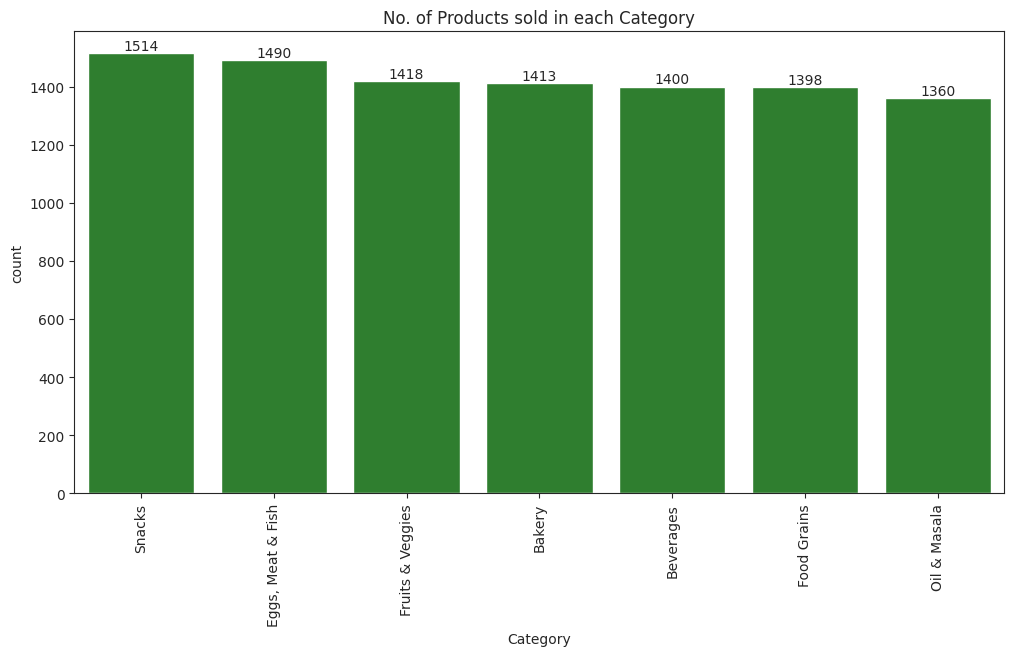

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x="Category", color="#228B22", order=df["Category"].value_counts().index)
ax.set_title("No. of Products sold in each Category")
ax.tick_params(axis="x", rotation=90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

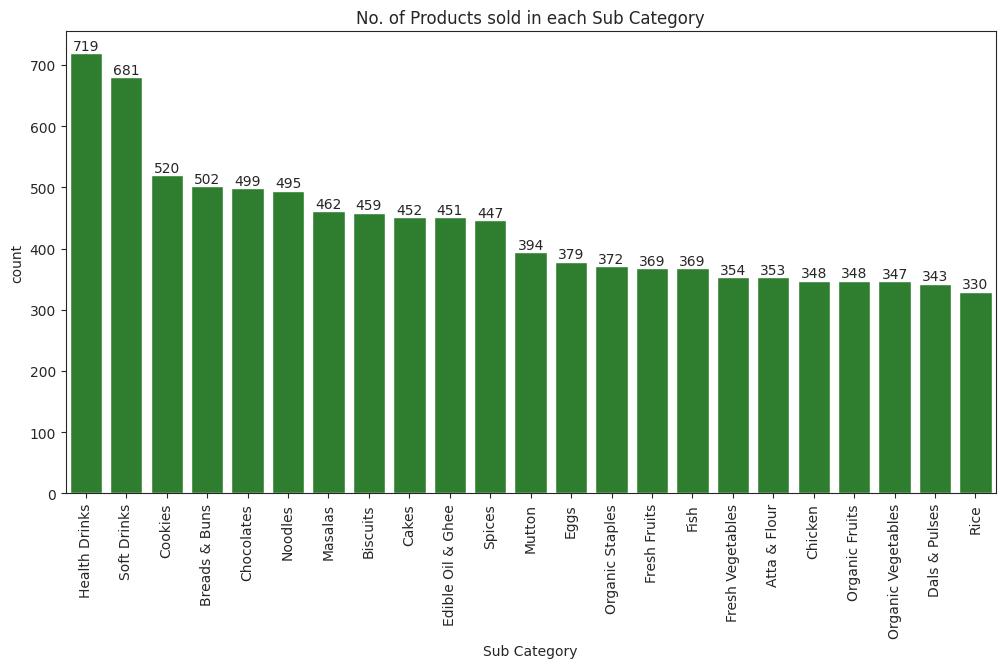

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x="Sub Category", color="#228B22", order=df["Sub Category"].value_counts().index)
ax.set_title("No. of Products sold in each Sub Category")
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

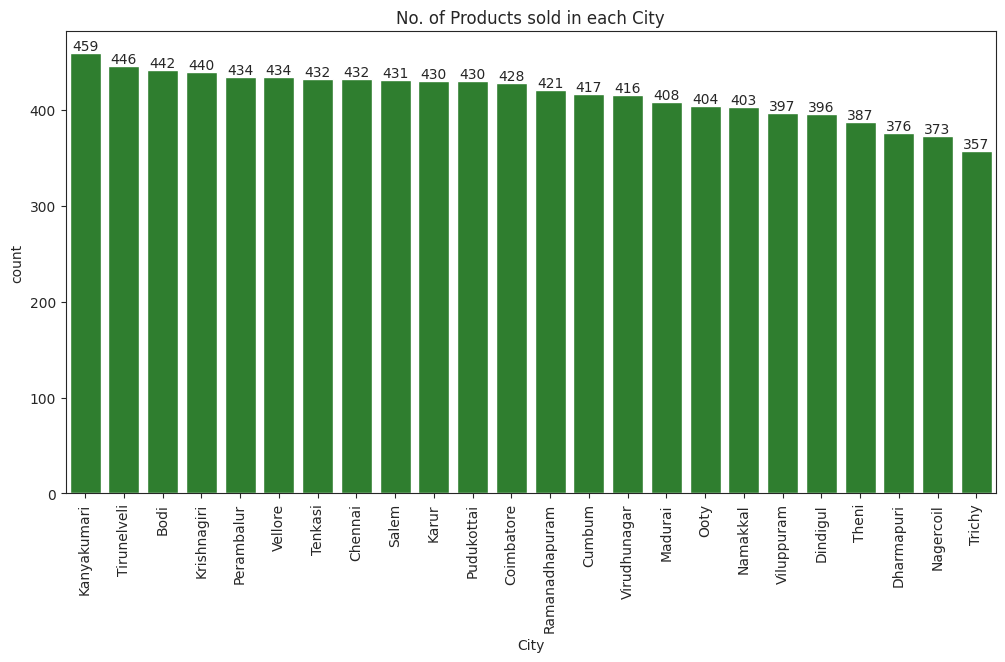

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x="City", color="#228B22", order=df["City"].value_counts().index)
ax.set_title("No. of Products sold in each City")
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

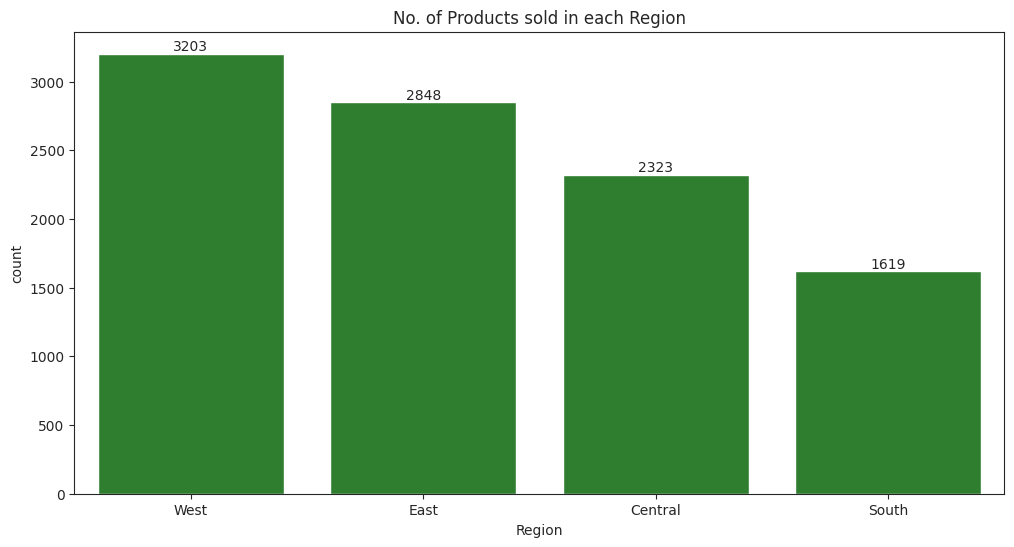

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x="Region", color="#228B22", order=df["Region"].value_counts().index)
ax.set_title("No. of Products sold in each Region")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

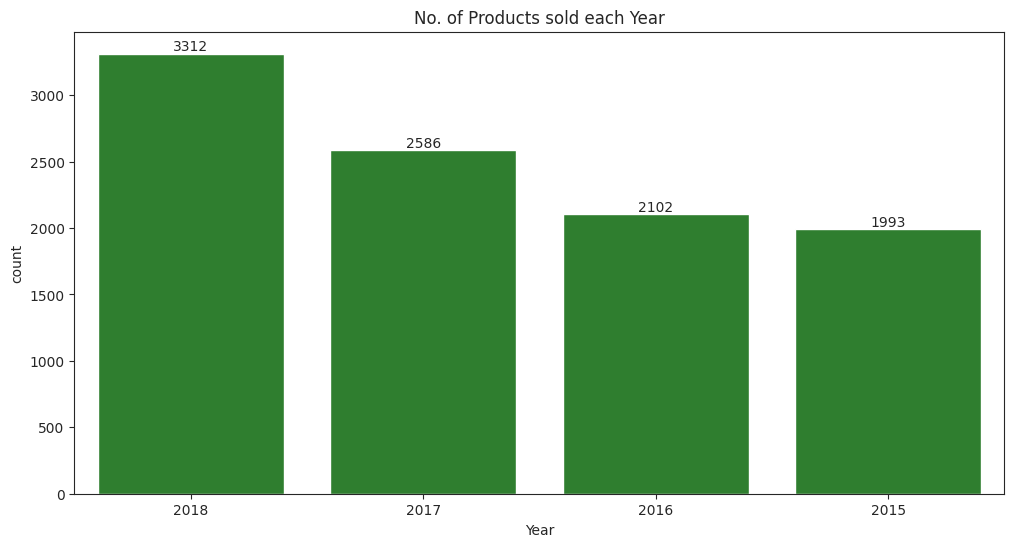

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x="Year", color="#228B22", order=df["Year"].value_counts().index)
ax.set_title("No. of Products sold each Year")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

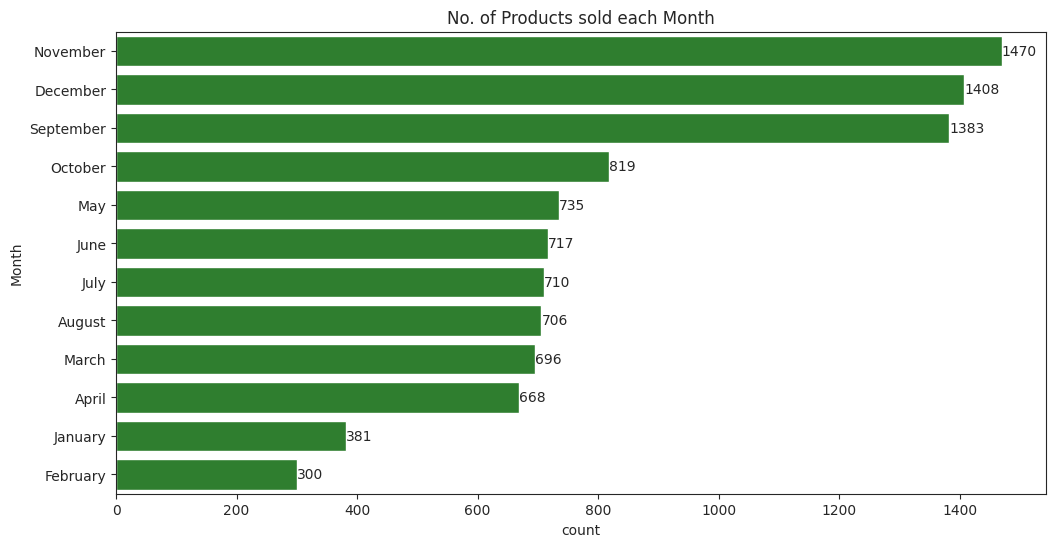

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, y="Month", color="#228B22", order=df["Month"].value_counts().index)
ax.set_title("No. of Products sold each Month")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

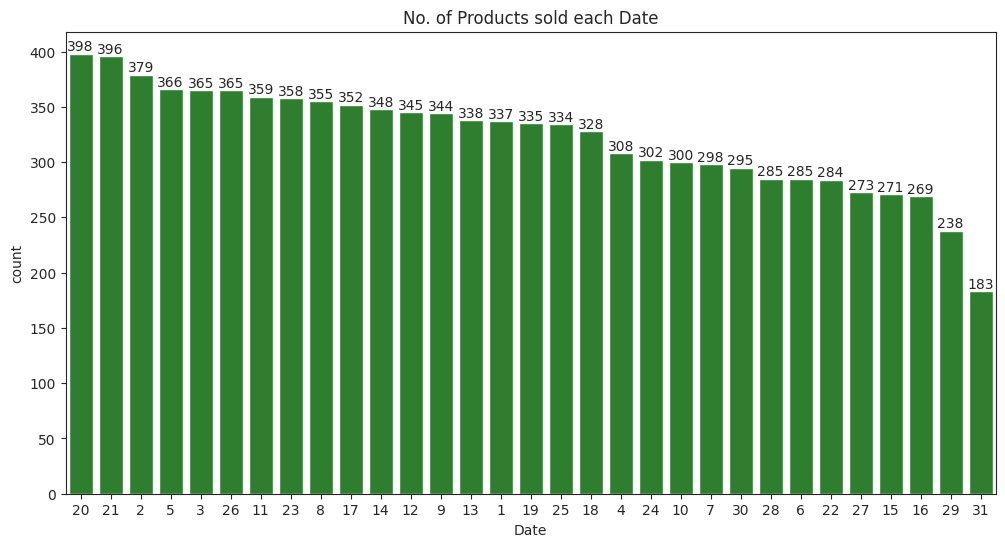

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x="Date", color="#228B22", order=df["Date"].value_counts().index)
ax.set_title("No. of Products sold each Date")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

In [ ]:
sales_by_category = df.groupby(["Category"])["Sales"].sum().sort_values(ascending=False)

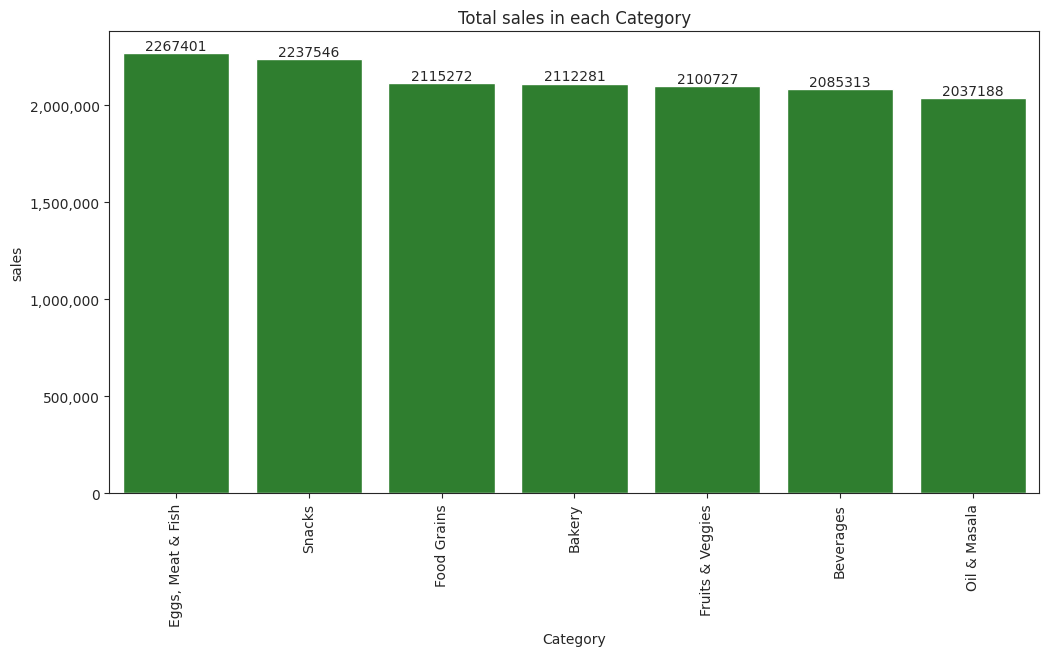

In [ ]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values,
            color="#228B22", order=df.groupby(["Category"])["Sales"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('sales')
ax.tick_params(axis="x", rotation=90)
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total sales in each Category")

plt.show()

In [ ]:
sales_by_sub_category = df.groupby(["Sub Category"])["Sales"].sum().sort_values(ascending=False)


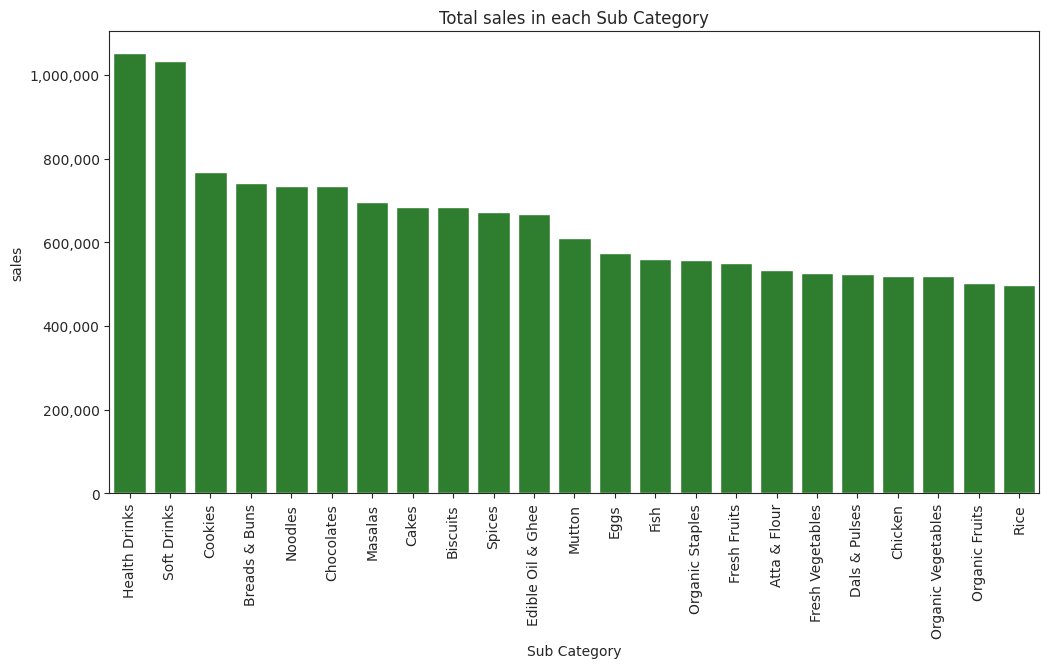

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=sales_by_sub_category.index, y=sales_by_sub_category.values,
            color="#228B22", order=df.groupby(["Sub Category"])["Sales"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('sales')
ax.tick_params(axis='x', rotation=90)
ax.set_title("Total sales in each Sub Category")

plt.show()

In [ ]:
sales_by_region = df.groupby(["Region"])["Sales"].sum().sort_values(ascending=False)

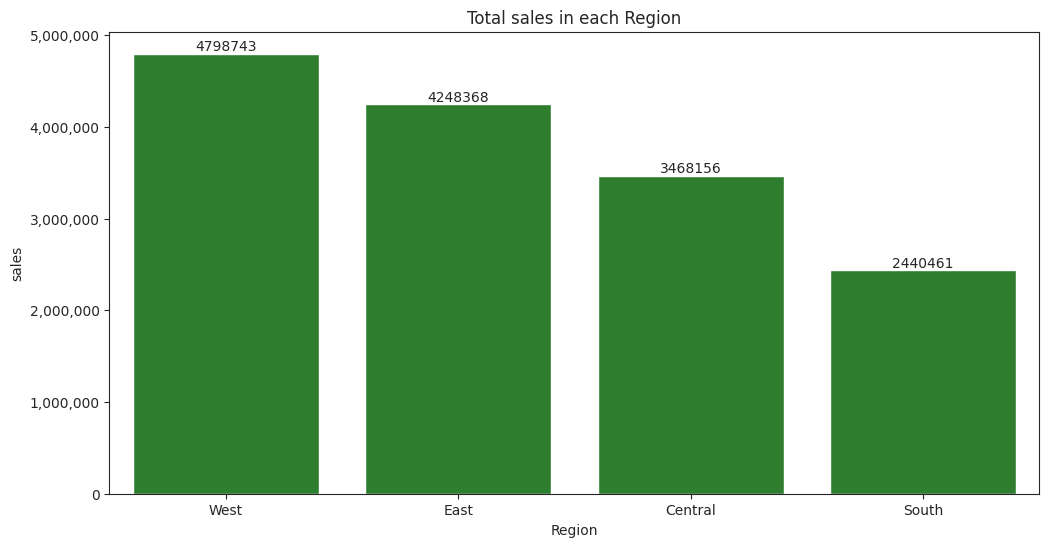

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values,
            color="#228B22", order=df.groupby(["Region"])["Sales"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('sales')
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total sales in each Region")

plt.show()


In [ ]:
sales_by_city = df.groupby(["City"])["Sales"].sum().sort_values(ascending=False)

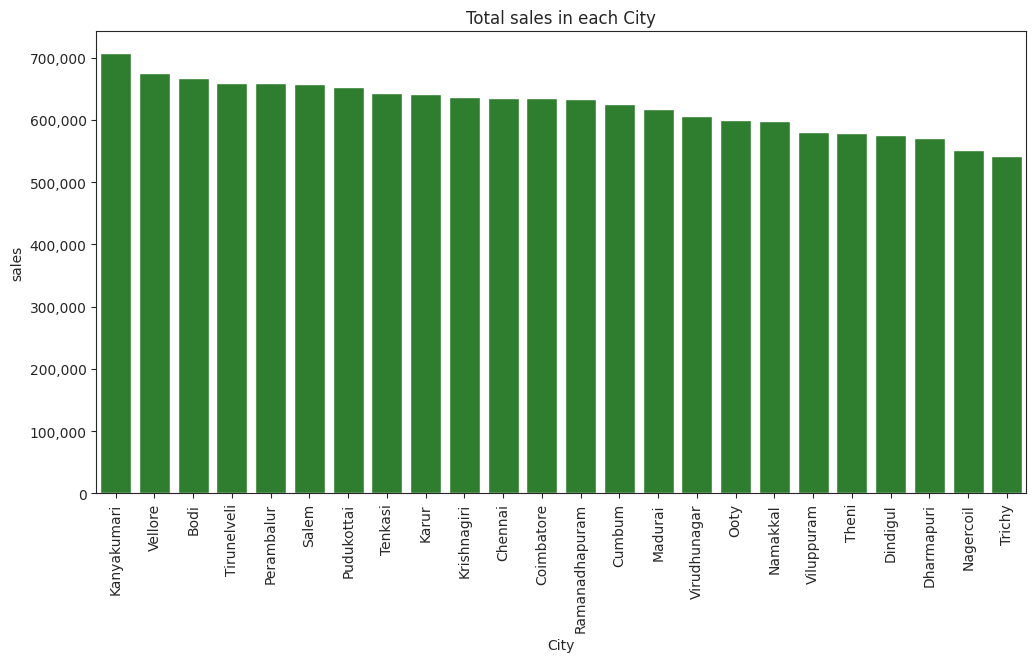

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=sales_by_city.index, y=sales_by_city.values,
            color="#228B22", order=df.groupby(["City"])["Sales"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('sales')
ax.tick_params(axis='x', rotation=90)
ax.set_title("Total sales in each City")

plt.show()

In [ ]:
sales_by_month = df.groupby(["Month"])["Sales"].sum().sort_values(ascending=False)

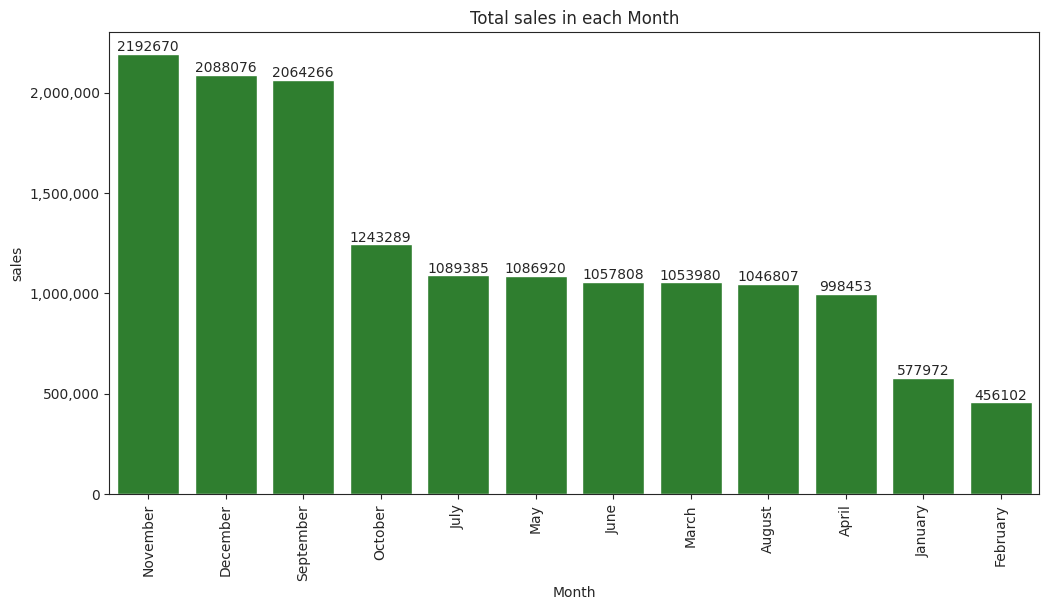

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=sales_by_month.index, y=sales_by_month.values,
            color="#228B22", order=df.groupby(["Month"])["Sales"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('sales')
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total sales in each Month")

plt.show()

In [ ]:
sales_by_year = df.groupby(["Year"])["Sales"].sum().sort_values(ascending=False)

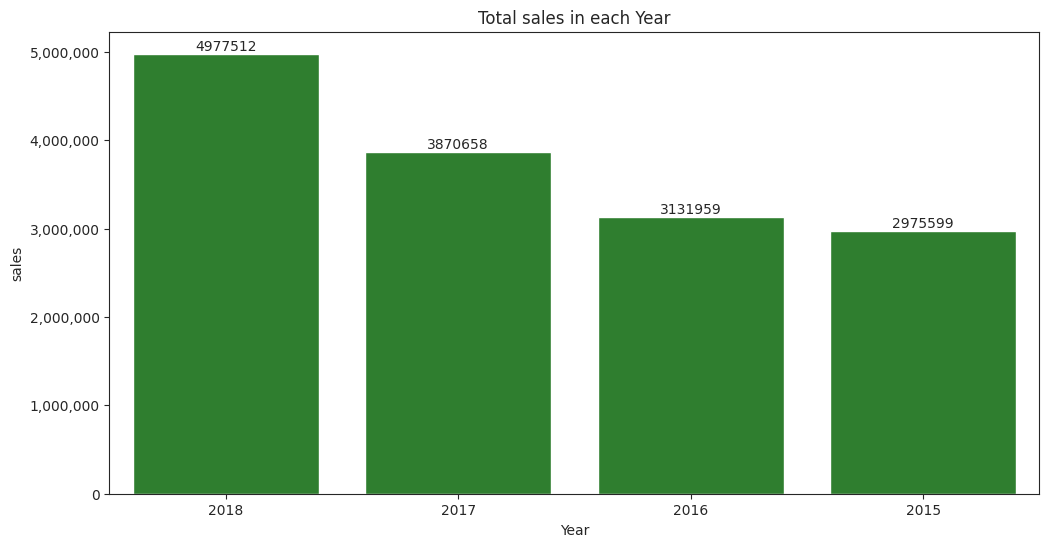

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=sales_by_year.index, y=sales_by_year.values,
            color="#228B22", order=df.groupby(["Year"])["Sales"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('sales')
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total sales in each Year")

plt.show()

In [ ]:
profit_by_category = df.groupby(["Category"])["Profit"].sum().sort_values(ascending=False)

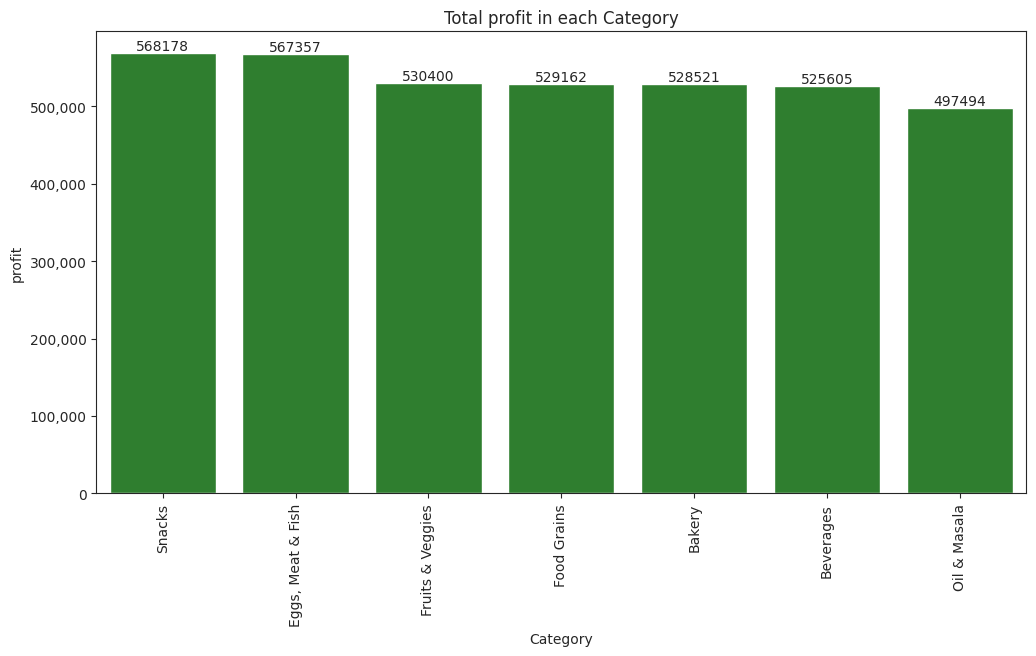

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=profit_by_category.index, y=profit_by_category.values,
            color="#228B22", order=df.groupby(["Category"])["Profit"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('profit')
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total profit in each Category")

plt.show()

In [ ]:
profit_by_sub_category = df.groupby(["Sub Category"])["Profit"].sum().sort_values(ascending=False)

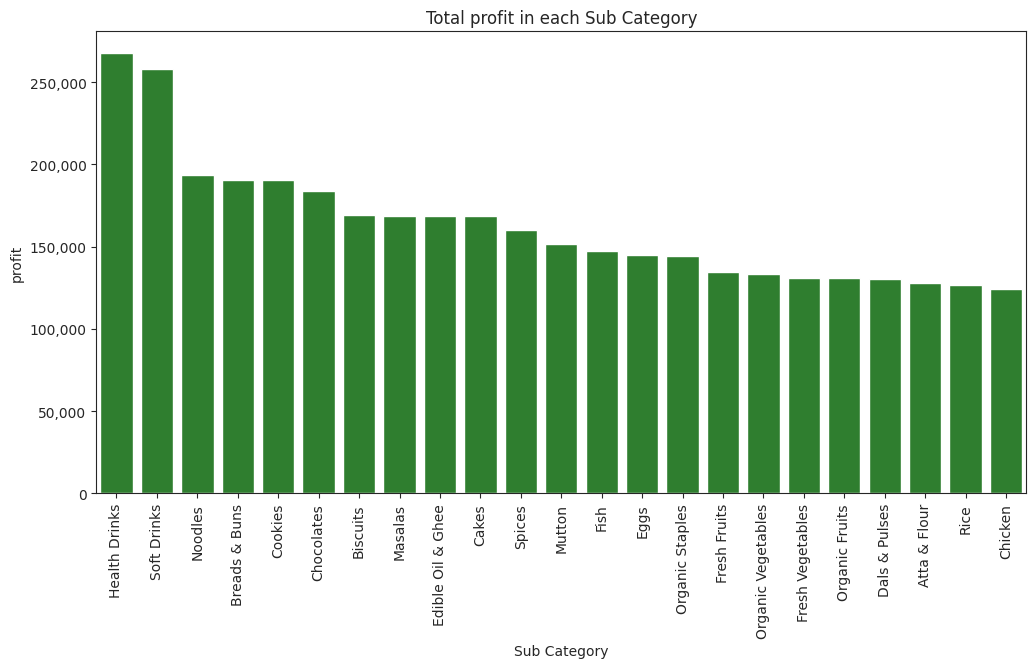

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=profit_by_sub_category.index, y=profit_by_sub_category.values,
            color="#228B22", order=df.groupby(["Sub Category"])["Profit"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('profit')
ax.tick_params(axis='x', rotation=90)
ax.set_title("Total profit in each Sub Category")

plt.show()

In [ ]:
profit_by_region = df.groupby(["Region"])["Profit"].sum().sort_values(ascending=False)

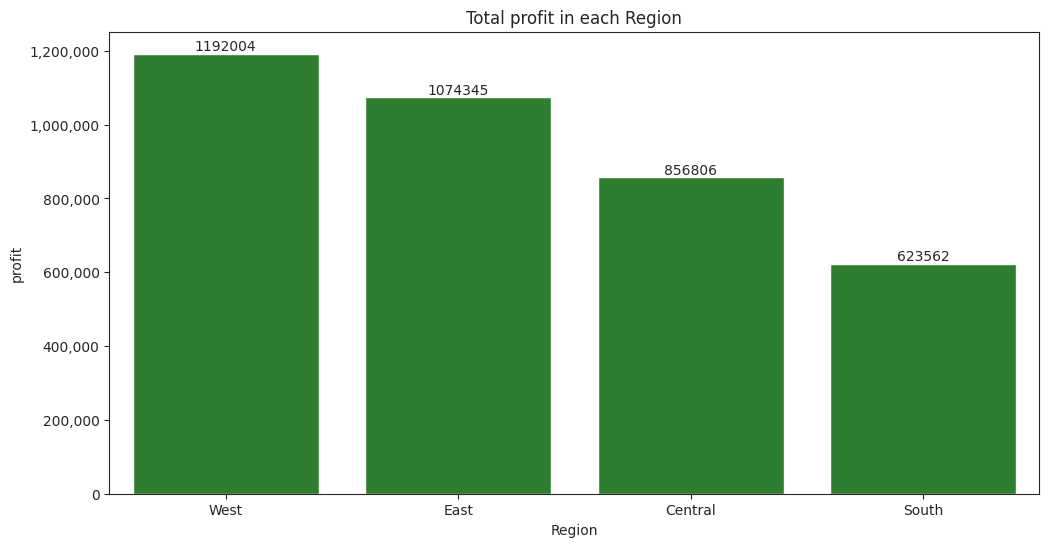

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=profit_by_region.index, y=profit_by_region.values,
            color="#228B22", order=df.groupby(["Region"])["Profit"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('profit')
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total profit in each Region")

plt.show()

In [ ]:
profit_by_city = df.groupby(["City"])["Profit"].sum().sort_values(ascending=False)

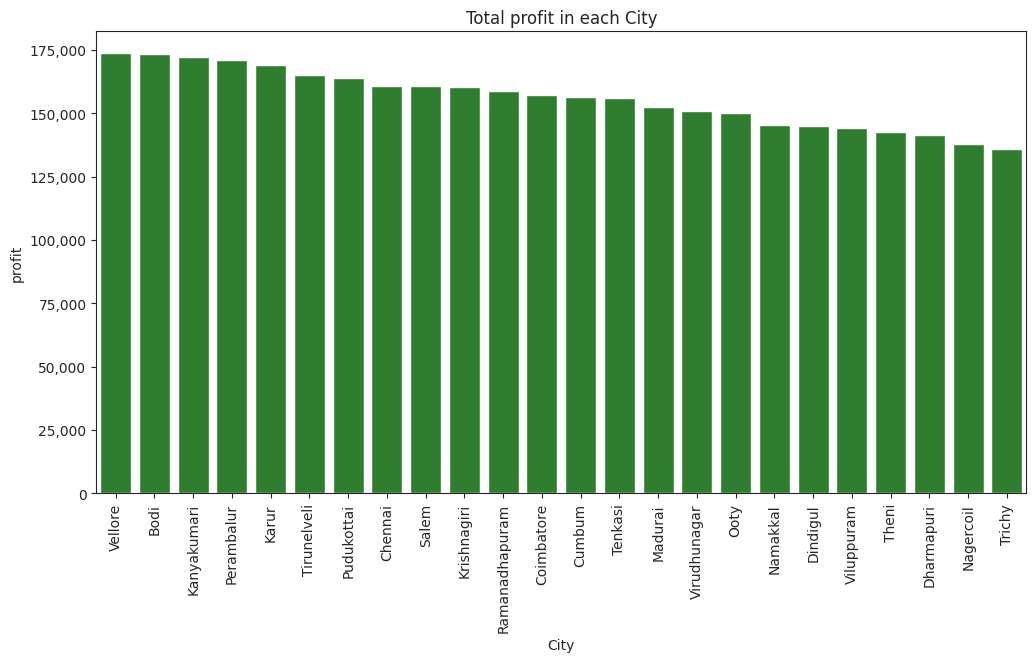

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=profit_by_city.index, y=profit_by_city.values,
            color="#228B22", order=df.groupby(["City"])["Profit"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('profit')
ax.tick_params(axis='x', rotation=90)
ax.set_title("Total profit in each City")

plt.show()

In [ ]:
profit_by_month = df.groupby(["Month"])["Profit"].sum().sort_values(ascending=False)


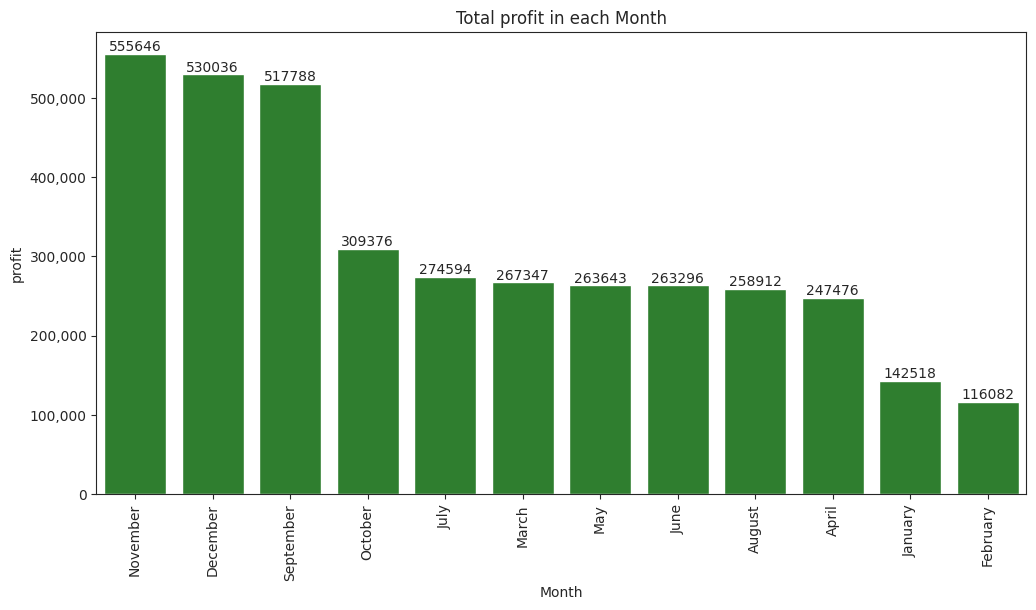

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=profit_by_month.index, y=profit_by_month.values,
            color="#228B22", order=df.groupby(["Month"])["Profit"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('profit')
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total profit in each Month")

plt.show()


In [ ]:
profit_by_year = df.groupby(["Year"])["Profit"].sum().sort_values(ascending=False)


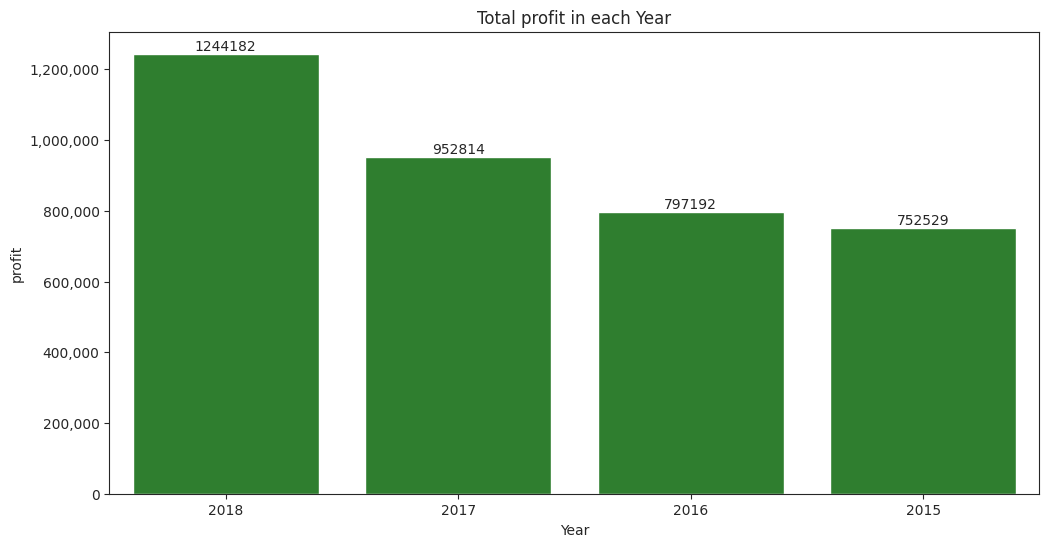

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=profit_by_year.index, y=profit_by_year.values,
            color="#228B22", order=df.groupby(["Year"])["Profit"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('profit')
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total profit in each Year")

plt.show()

In [ ]:
highest_total_sales_by_customers = df.groupby(["Customer Name"])["Sales"].sum().sort_values(ascending=False).head(10)


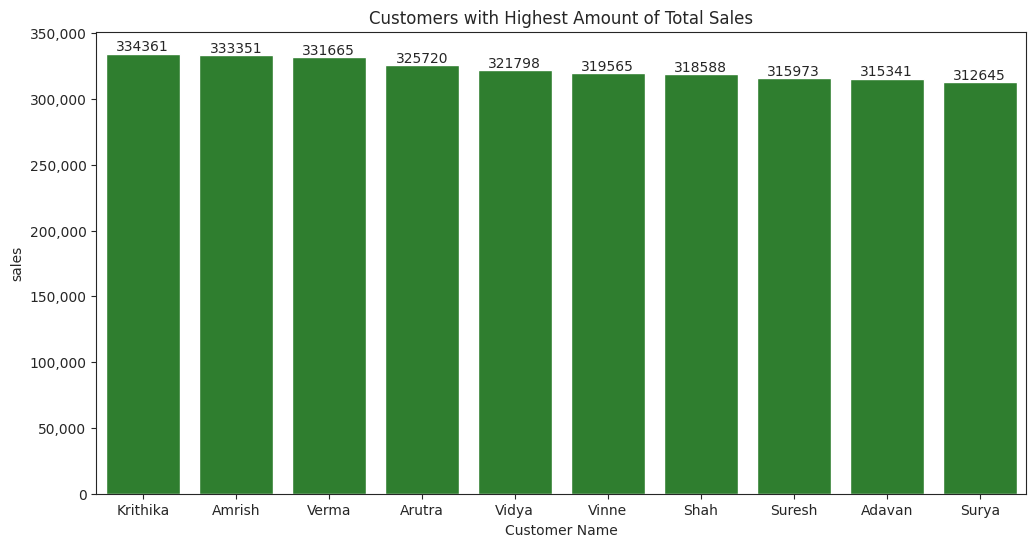

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=highest_total_sales_by_customers.index, y=highest_total_sales_by_customers.values,
            color="#228B22", order=df.groupby(["Customer Name"])["Sales"].sum().sort_values(ascending=False).head(10).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('sales')
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Customers with Highest Amount of Total Sales")

plt.show()

In [ ]:
profit_on_purchase_by_customers = df.groupby(["Customer Name"])["Profit"].sum().sort_values(ascending=False).head(10)


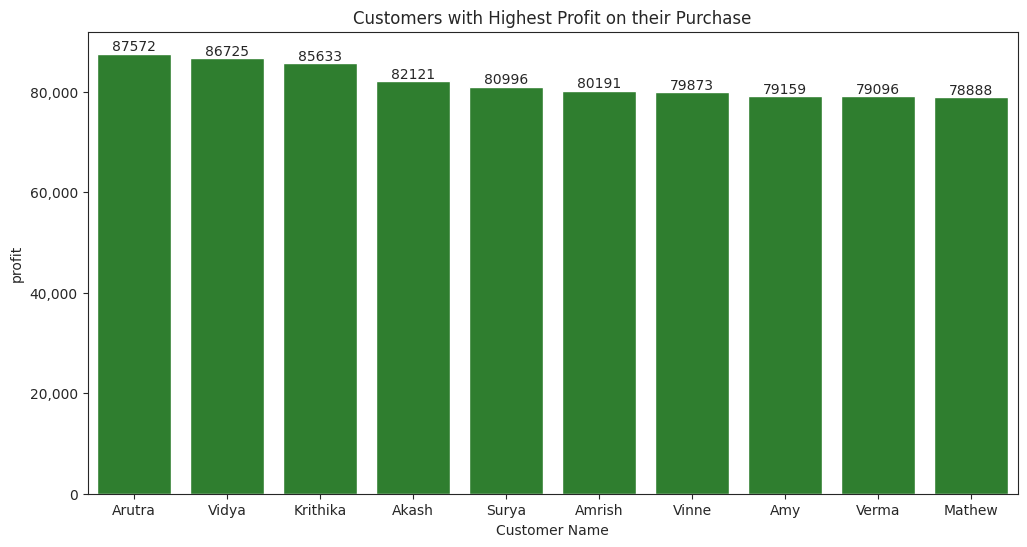

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=profit_on_purchase_by_customers.index, y=profit_on_purchase_by_customers.values,
            color="#228B22", order=df.groupby(["Customer Name"])["Profit"].sum().sort_values(ascending=False).head(10).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('profit')
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Customers with Highest Profit on their Purchase")

plt.show()

In [ ]:
discount_availed_by_customers = df.groupby(["Customer Name"])["Discount_Amt"].sum().sort_values(ascending=False).head(10)


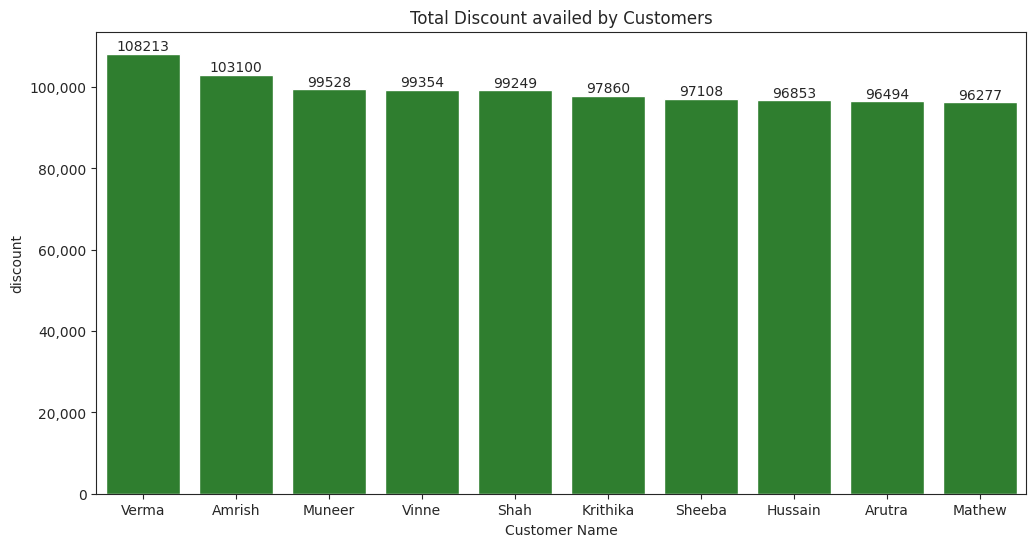

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=discount_availed_by_customers.index, y=discount_availed_by_customers.values,
            color="#228B22", order=df.groupby(["Customer Name"])["Discount_Amt"].sum().sort_values(ascending=False).head(10).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('discount')
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total Discount availed by Customers")

plt.show()